# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB Movie Data dataset lists about 11k movies produced by Production Companies and several important details about those movies such as:
<ul>
    <li>A Unique Id</li>
    <li>Movie Name</li>
    <li>Cast</li>
    <li>Director(s)</li>
    <li>Runtime</li>
    <li>Production Companies</li>
    <li>Release Year</li>
    <li>Vote Average</li>
    <li>Budget (adjusted to 2010 rates)</li>
    <li>Revenues (adjusted to 2010 rates)</li>
    <li>Popularity Score</li>
</ul>

Some of the typical questions that I have regarding this dataset are:
<ol>
    <li>Which Production Companies had the highest budget?</li>
    <li>Which Production Companies had the highest revenues?</li>
    <li>Did big budget movies produce higher revenues? Are there exceptions?</li>
    <li>Which movies had revenues lower than production budgets?</li>
    <li>Who were the popular directors?</li>
    <li>Who were the popular actors?</li>
    <li>Which genres were popular?</li>
    <li>Which actors had most movies?</li>
    <li>Which directors had most movies?</li>
    <li>Which genres had most movies?</li>
    <li>Is there a correlation between movie runtimes and popularity?</li>
    <li>Are more movies released each year?</li>
    <li>Who are directors' favorite actors?</li>
    <li>Who are actors' favorite directors?</li>
</ol>    

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To supporess budget and revenue values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format


<a id='wrangling'></a>
## Data Wrangling

Steps in Data Wrangling:
<ul>
    <li>Load data from "tmdb-movies.csv" file into a dataframe called "df_movie_list"</li>
    <li>Drop the following columns from the dataframe:</li>
    <ul>
        <li>budget - instead, I am planning to use the budget_adj column</li>
        <li>revenue - instead, I am planning to use the revenue_adj column</li>
        <li>Not relevant to my analysis:</li>
        <ul>
            <li>homepage</li>
            <li>tagline</li>
            <li>keywords</li>
            <li>overview</li>
        </ul>
    </ul>
    <li>Create the following new dataframes for the following data by separating the pipe-separated values into separate rows</li>
    <ul>
        <li>Cast</li>
        <li>Directors</li>
        <li>Genres</li>
        <li>Production Companies</li>
    </ul>
</ul>


In [81]:
# Load movie list into a dataframe
df_movie_list = pd.read_csv("tmdb-movies.csv")

# Drop columns not part of the analysis
df_movie_list.drop(['budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)

df_movie_list.head()

,id,imdb_id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


### Data Cleaning

In the next four steps, I am creating new dataframes as mentioned in the Data Wrangling section above by separating the pipe-separated values in certain columns into separate rows. I am doing this to make it easy for me to answer the questions that I have around these columns.

I wasn't able to figure out a programmatic way of doing this for all the four columns in one code snippet because my attempts do so kept producing errors. Therefore, I went with the approach of repeating the steps for each of those columns.

In each of the below four code snippets, I used the string split function to separate the values in a column into separate rows. I then added a discriminator column to each of these dataframes to identify the type of information that was stored in a row. This is because I later combined all the rows into a single dataframe to make merges easier in my queries.

The steps are documented in the code snippets.

In [82]:
# Create new dataframes by separating the pipe-separated values into separate rows
# Keep these dataframes separate so that we may merge them with the main dataframe for analysis

# First, copy only id and cast columns
df_cast_tmp = df_movie_list[['id', 'cast']].copy()

# Next, drop null values
df_cast_tmp.dropna(inplace = True)

# Make five copies of the dataframe to split the cast column into five rows
# Need to figure out  programmatic way of doing this for any number of values separated by the separator
df_c1 = df_cast_tmp.copy()
df_c2 = df_cast_tmp.copy()
df_c3 = df_cast_tmp.copy()
df_c4 = df_cast_tmp.copy()
df_c5 = df_cast_tmp.copy()

# Split data in "cast" into five rows separated by "|"
df_c1['cast'] = df_cast_tmp['cast'].str.split("|", n = -1, expand = True)[0]
df_c2['cast'] = df_cast_tmp['cast'].str.split("|", n = -1, expand = True)[1]
df_c3['cast'] = df_cast_tmp['cast'].str.split("|", n = -1, expand = True)[2]
df_c4['cast'] = df_cast_tmp['cast'].str.split("|", n = -1, expand = True)[3]
df_c5['cast'] = df_cast_tmp['cast'].str.split("|", n = -1, expand = True)[4]

# Merge the rows into a single dataframe
df_cast = df_c1.append(df_c2.append(df_c3.append(df_c4.append(df_c5))))

# Since not all rows in the original dataframe may have five cast members, drop the rows with null values
df_cast.dropna(inplace = True)

# Add a new column to the dataframe titled "row_type"
# We will use this later as a discriminator column when we combine all these dataframes into one again
row_type = np.repeat('Cast', df_cast['id'].count())
df_cast['type'] = row_type

# Rename the "cast" column to a generic name
df_cast = df_cast.rename(columns = {'cast': 'value'})

# Verification
df_cast.query('id == 76341')
# df_cast['cast'].isnull().sum()
# df_cast_tmp['cast'].str.split("|", n = -1, expand = True)
# df_cast.head()

,id,value,type
1,76341,Tom Hardy,Cast
1,76341,Charlize Theron,Cast
1,76341,Hugh Keays-Byrne,Cast
1,76341,Nicholas Hoult,Cast
1,76341,Josh Helman,Cast


In [84]:
# Repeat these steps for each of the columns with multiple values separated by a separator
# First, copy only id and director columns
df_dir_tmp = df_movie_list[['id', 'director']].copy()

# Next, drop null values
df_dir_tmp.dropna(inplace = True)

# Make five copies of the dataframe to split the cast column into five rows
# Need to figure out  programmatic way of doing this for any number of values separated by the separator
df_d1 = df_dir_tmp.copy()
df_d2 = df_dir_tmp.copy()
df_d3 = df_dir_tmp.copy()
df_d4 = df_dir_tmp.copy()
df_d5 = df_dir_tmp.copy()

# Split data in "director" into five rows separated by "|"
df_d1['director'] = df_dir_tmp['director'].str.split("|", n = -1, expand = True)[0]
df_d2['director'] = df_dir_tmp['director'].str.split("|", n = -1, expand = True)[1]
df_d3['director'] = df_dir_tmp['director'].str.split("|", n = -1, expand = True)[2]
df_d4['director'] = df_dir_tmp['director'].str.split("|", n = -1, expand = True)[3]
df_d5['director'] = df_dir_tmp['director'].str.split("|", n = -1, expand = True)[4]

# Merge the rows into a single dataframe
df_dir = df_d1.append(df_d2.append(df_d3.append(df_d4.append(df_d5))))

# Since not all rows in the original dataframe may have five directors, drop the rows with null values
df_dir.dropna(inplace = True)

# Add a new column to the dataframe titled "row_type"
# We will use this later as a discriminator column when we combine all these dataframes into one again
row_type = np.repeat('Director', df_dir['id'].count())
df_dir['type'] = row_type

# Rename the "cast" column to a generic name
df_dir = df_dir.rename(columns = {'director': 'value'})

# Verification
df_dir.query('id == 76341')
# df_dir['director'].isnull().sum()
# df_dir_tmp['director'].str.split("|", n = -1, expand = True)
# df_dir.head()

,id,value,type
1,76341,George Miller,Director


In [85]:
# Repeat these steps for each of the columns with multiple values separated by a separator
# First, copy only id and genres columns
df_genres_tmp = df_movie_list[['id', 'genres']].copy()

# Next, drop null values
df_genres_tmp.dropna(inplace = True)

# Make five copies of the dataframe to split the cast column into five rows
# Need to figure out  programmatic way of doing this for any number of values separated by the separator
df_g1 = df_genres_tmp.copy()
df_g2 = df_genres_tmp.copy()
df_g3 = df_genres_tmp.copy()
df_g4 = df_genres_tmp.copy()
df_g5 = df_genres_tmp.copy()

# Split data in "genres" into five rows separated by "|"
df_g1['genres'] = df_genres_tmp['genres'].str.split("|", n = -1, expand = True)[0]
df_g2['genres'] = df_genres_tmp['genres'].str.split("|", n = -1, expand = True)[1]
df_g3['genres'] = df_genres_tmp['genres'].str.split("|", n = -1, expand = True)[2]
df_g4['genres'] = df_genres_tmp['genres'].str.split("|", n = -1, expand = True)[3]
df_g5['genres'] = df_genres_tmp['genres'].str.split("|", n = -1, expand = True)[4]

# Merge the rows into a single dataframe
df_genre = df_g1.append(df_g2.append(df_g3.append(df_g4.append(df_g5))))

# Since not all rows in the original dataframe may have five genres, drop the rows with null values
df_genre.dropna(inplace = True)

# Add a new column to the dataframe titled "row_type"
# We will use this later as a discriminator column when we combine all these dataframes into one again
row_type = np.repeat('Genre', df_genre['id'].count())
df_genre['type'] = row_type

# Rename the "cast" column to a generic name
df_genre = df_genre.rename(columns = {'genres': 'value'})

# Verification
df_genre.query('id == 76341')
# df_genre['genres'].isnull().sum()
# df_genres_tmp['genres'].str.split("|", n = -1, expand = True)
# df_genre.head()

,id,value,type
1,76341,Action,Genre
1,76341,Adventure,Genre
1,76341,Science Fiction,Genre
1,76341,Thriller,Genre


In [86]:
# Repeat these steps for each of the columns with multiple values separated by a separator
# First, copy only id and production_companies columns
df_prod_co_tmp = df_movie_list[['id', 'production_companies']].copy()

# Next, drop null values
df_prod_co_tmp.dropna(inplace = True)

# Make five copies of the dataframe to split the cast column into five rows
# Need to figure out  programmatic way of doing this for any number of values separated by the separator
df_p1 = df_prod_co_tmp.copy()
df_p2 = df_prod_co_tmp.copy()
df_p3 = df_prod_co_tmp.copy()
df_p4 = df_prod_co_tmp.copy()
df_p5 = df_prod_co_tmp.copy()

# Split data in "production_companies" into five rows separated by "|"
df_p1['production_companies'] = df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)[0]
df_p2['production_companies'] = df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)[1]
df_p3['production_companies'] = df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)[2]
df_p4['production_companies'] = df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)[3]
df_p5['production_companies'] = df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)[4]

# Merge the rows into a single dataframe
df_prod_co = df_p1.append(df_p2.append(df_p3.append(df_p4.append(df_p5))))

# Since not all rows in the original dataframe may have five production companies, drop the rows with null values
df_prod_co.dropna(inplace = True)

# Add a new column to the dataframe titled "row_type"
# We will use this later as a discriminator column when we combine all these dataframes into one again
row_type = np.repeat('Production Company', df_prod_co['id'].count())
df_prod_co['type'] = row_type

# Rename the "cast" column to a generic name
df_prod_co = df_prod_co.rename(columns = {'production_companies': 'value'})

# Verification
df_prod_co.query('id == 76341')
# df_prod_co['production_companies'].isnull().sum()
# df_prod_co_tmp['production_companies'].str.split("|", n = -1, expand = True)
# df_prod_co.head()

,id,value,type
1,76341,Village Roadshow Pictures,Production Company
1,76341,Kennedy Miller Productions,Production Company


In [87]:
# Create a single dataframe to combine all the above 
df_mv = df_cast.append(df_dir.append(df_genre.append(df_prod_co)))

df_mv.query('id == 76341')
# df_mv.isnull().sum().any()

,id,value,type
1,76341,Tom Hardy,Cast
1,76341,Charlize Theron,Cast
1,76341,Hugh Keays-Byrne,Cast
1,76341,Nicholas Hoult,Cast
1,76341,Josh Helman,Cast
1,76341,George Miller,Director
1,76341,Action,Genre
1,76341,Adventure,Genre
1,76341,Science Fiction,Genre
1,76341,Thriller,Genre


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which Production Companies had the highest budget?)

In [88]:
df_top10_prodco_by_budget = df_movie_list.merge(df_mv.query('type == "Production Company"'), on='id', how='inner').groupby('value').sum()['budget_adj'].nlargest(10)
df_top10_prodco_by_budget.head(10)

value
Warner Bros.                                24,281,184,329.70
Universal Pictures                          19,050,474,613.29
Paramount Pictures                          17,145,279,612.80
Twentieth Century Fox Film Corporation      13,104,390,946.64
Columbia Pictures                           12,786,450,817.13
Walt Disney Pictures                        11,747,793,345.17
New Line Cinema                              7,202,735,433.91
Touchstone Pictures                          6,996,645,251.38
Columbia Pictures Corporation                6,550,126,060.05
Metro-Goldwyn-Mayer (MGM)                    6,142,258,083.45
Name: budget_adj, dtype: float64

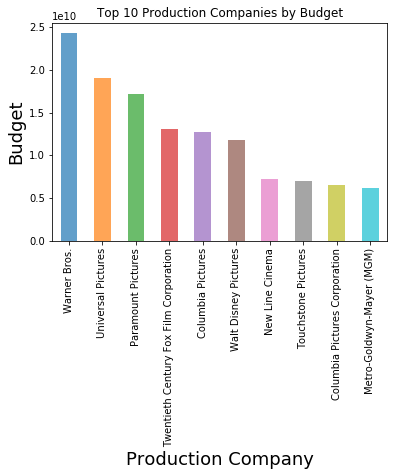

In [92]:
# Representing the answer to Question 1 visually
# sending results of group by to matplotlib

df_top10_prodco_by_budget.plot(kind='bar', title = 'Top 10 Production Companies by Budget', alpha = .7)
plt.xlabel('Production Company', fontsize=18)
plt.ylabel('Budget', fontsize=18);

### Research Question 2  (Which Production Companies had the highest revenues?)

In [93]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df_top10_prodco_by_revenue = df_movie_list.merge(df_mv.query('type == "Production Company"'), on='id', how='inner').groupby('value').sum()['revenue_adj'].nlargest(10)
df_top10_prodco_by_revenue.head(10)

value
Warner Bros.                                71,048,487,651.52
Universal Pictures                          64,321,960,187.24
Paramount Pictures                          57,469,667,370.21
Twentieth Century Fox Film Corporation      52,247,285,068.56
Walt Disney Pictures                        37,386,388,788.77
Columbia Pictures                           33,262,002,792.31
New Line Cinema                             23,076,784,391.32
Amblin Entertainment                        21,299,244,854.09
Metro-Goldwyn-Mayer (MGM)                   20,428,218,177.75
Columbia Pictures Corporation               18,118,991,141.35
Name: revenue_adj, dtype: float64

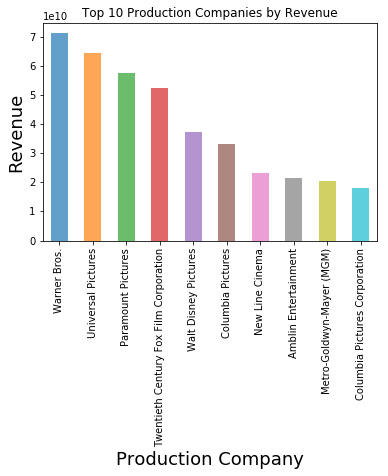

In [94]:
# Representing the answer to Question 2 visually
# sending results of group by to matplotlib

df_top10_prodco_by_revenue.plot(kind='bar', title = 'Top 10 Production Companies by Revenue', alpha = .7)
plt.xlabel('Production Company', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

### Research Question 3  (Did big budget movies produce higher revenues? Are there exceptions?)

In [95]:
df_big_budget_movies = df_movie_list.groupby('original_title').sum()[['budget_adj', 'revenue_adj']]
df_big_budget_movies.head(10)

,budget_adj,revenue_adj
original_title,,
$5 a Day,0.00,0.00
$9.99,0.00,0.00
'71,0.00,"1,497,553.12"
(500) Days of Summer,"7,623,003.26","61,718,613.20"
(T)Raumschiff Surprise - Periode 1,0.00,0.00
*batteries not included,0.00,"124,910,637.06"
...And Justice for All,0.00,"100,051,648.28"
1,0.00,0.00
10,0.00,0.00


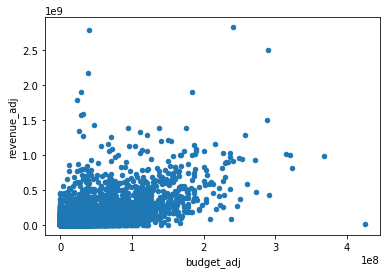

In [96]:
# Representing the answer to Question 3 visually
df_big_budget_movies.plot(x = 'budget_adj', y = 'revenue_adj', kind = 'scatter');

<a id='wrangling'></a>
### Research Question 3 - Conclusion

In general, the bigger the budget, the more revenue a movie seemed to generate. However, there are outliers in both directions as can be seen in the diagram above - some movies with lower budgets reported very high revenues and, to the contrary, some movies with bigger budgets reported very low revenues.

### Research Question 4  (Which movies had revenues lower than production budgets?)

In [97]:
df_low_revenue_movies = df_movie_list[['original_title', 'budget_adj', 'revenue_adj']].query('revenue_adj < budget_adj and revenue_adj != 0').nlargest(10, 'budget_adj')
df_low_revenue_movies.head(10)

,original_title,budget_adj,revenue_adj
2244,The Warrior's Way,"425,000,000.00","11,087,569.00"
5508,The Lone Ranger,"238,688,504.95","83,578,333.82"
2435,The 13th Warrior,"209,448,455.46","80,767,119.37"
7448,Evan Almighty,"184,042,001.96","181,938,664.80"
3925,Treasure Planet,"169,716,595.11","132,837,318.40"
2676,Final Fantasy: The Spirits Within,"168,713,871.99","104,838,837.00"
7031,The Alamo,"167,394,582.97","29,807,735.20"
5462,47 Ronin,"163,805,836.73","141,305,911.61"
6590,Flushed Away,"161,168,704.59","69,723,654.08"
6313,Stealth,"150,736,044.10","85,900,499.92"


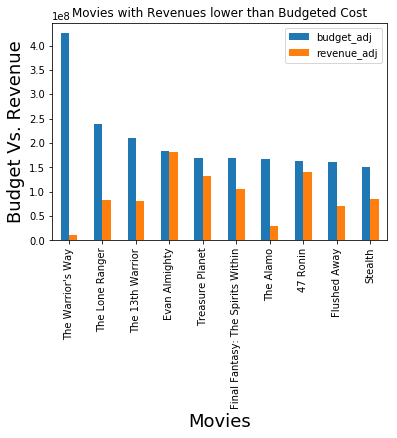

In [98]:
# Representing the answer to Question 4 visually
index = np.arange(len(df_low_revenue_movies.original_title))
df_low_revenue_movies.plot(kind='bar');
plt.xlabel('Movies', fontsize=18)
plt.ylabel('Budget Vs. Revenue', fontsize=18)
plt.xticks(index, df_low_revenue_movies.original_title, fontsize=10)
plt.title('Movies with Revenues lower than Budgeted Cost');

### Research Question 5  (Who were the popular directors?)

In [99]:
# Mesasured by the mean vote_average of all movies directed by them

df_popular_dir = df_movie_list.merge(df_mv.query('type == "Director"'), on='id', how='inner').groupby('value').mean()['vote_average'].nlargest(10)
df_popular_dir.head(10)

value
Mark Cousins                           9.20
Derek Frankowski                       8.80
David Mallet                           8.70
Curt Morgan                            8.50
James Payne                            8.50
Michael Henry Wilson                   8.50
Saul Swimmer                           8.50
Anthony Mandler                        8.40
Chris Hegedus                          8.40
David Dawkins                          8.40
Name: vote_average, dtype: float64

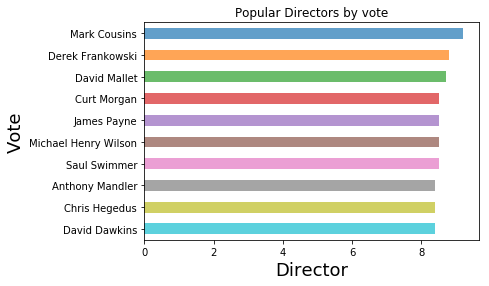

In [100]:
# Representing the answer to Question 5 visually
ax = df_popular_dir.plot(kind='barh', title = 'Popular Directors by vote', alpha = .7)
ax.invert_yaxis()
plt.xlabel('Director', fontsize=18)
plt.ylabel('Vote', fontsize=18);

### Research Question 6  (Who were the popular actors?)

In [101]:
# For a change, I am using the adjusted revenue earned by the movies that they acted in to do this ranking

df_popular_actors = df_movie_list.merge(df_mv.query('type == "Cast"'), on='id', how='inner').groupby('value').sum()['revenue_adj'].nlargest(10)
df_popular_actors.head(10)

value
Harrison Ford         14,683,483,145.71
Tom Cruise            11,212,800,243.23
Tom Hanks             10,672,385,155.22
Emma Watson            8,806,337,401.56
Ian McKellen           8,671,322,793.00
Eddie Murphy           8,572,389,604.53
Johnny Depp            8,564,523,652.67
Daniel Radcliffe       8,515,082,234.94
Rupert Grint           8,358,390,101.76
Bruce Willis           8,253,050,905.29
Name: revenue_adj, dtype: float64

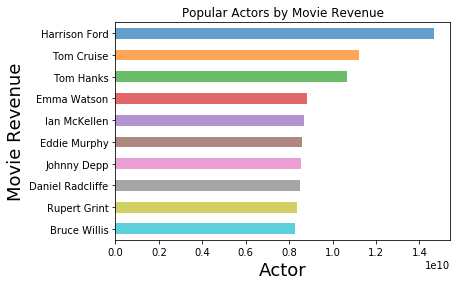

In [102]:
# Representing the answer to Question 6 visually
ax = df_popular_actors.plot(kind='barh', title = 'Popular Actors by Movie Revenue', alpha = .7)
ax.invert_yaxis()
plt.xlabel('Actor', fontsize=18)
plt.ylabel('Movie Revenue', fontsize=18);

### Research Question 7  (Which were the popular genres?)

In [103]:
# Again, measured using the mean of vote_average

df_popular_genres = df_movie_list.merge(df_mv.query('type == "Genre"'), on='id', how='inner').groupby('value').mean()['vote_average'].nlargest(10)
df_popular_genres.head(10)

value
Documentary                   6.91
Music                         6.48
History                       6.41
Animation                     6.40
War                           6.30
Drama                         6.16
Crime                         6.12
Western                       6.08
Romance                       6.04
Family                        6.00
Name: vote_average, dtype: float64

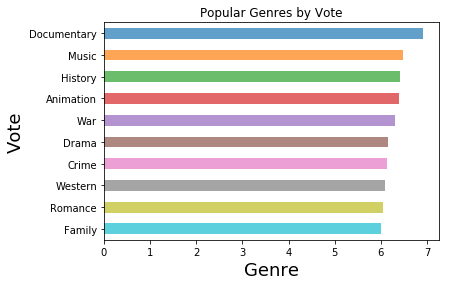

In [104]:
# Representing the answer to Question 7 visually
ax = df_popular_genres.plot(kind='barh', title = 'Popular Genres by Vote', alpha = .7)
ax.invert_yaxis()
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Vote', fontsize=18);

### Research Question 8 (Which directors had most movies?)

In [105]:
df_dir_with_max_movies = df_movie_list.merge(df_mv.query('type == "Director"'), on='id', how='inner').groupby('value').count()['id'].nlargest(10)
df_dir_with_max_movies.head(10)

value
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
Name: id, dtype: int64

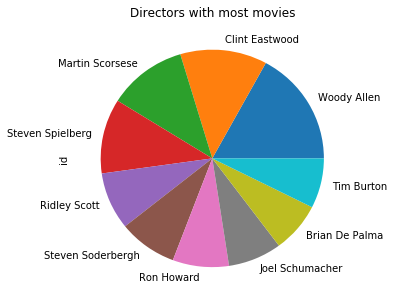

In [106]:
# Representing the answer to Question 8 visually
df_dir_with_max_movies.plot(kind='pie', title = 'Directors with most movies', figsize=(5, 5));

### Research Question 9 (Which actors had most movies?)

In [107]:
df_actors_with_most_movies = df_movie_list.merge(df_mv.query('type == "Cast"'), on='id', how='inner').groupby('value').count()['id'].nlargest(10)
df_actors_with_most_movies.head(10)

value
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
Name: id, dtype: int64

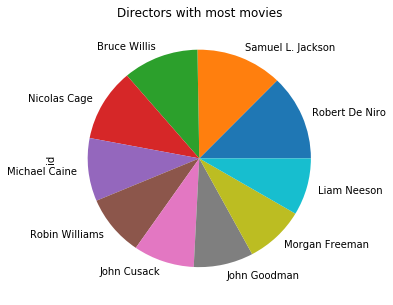

In [108]:
# Representing the answer to Question 9 visually
df_actors_with_most_movies.plot(kind='pie', title = 'Directors with most movies', figsize=(5, 5));

### Research Question 10 (Which genres had most movies?)

In [109]:
df_genres_with_max_movies = df_movie_list.merge(df_mv.query('type == "Genre"'), on='id', how='inner').groupby('value').count()['id'].nlargest(10)
df_genres_with_max_movies.head(10)

value
Drama              4763
Comedy             3793
Thriller           2910
Action             2387
Romance            1712
Horror             1637
Adventure          1471
Crime              1357
Science Fiction    1232
Family             1231
Name: id, dtype: int64

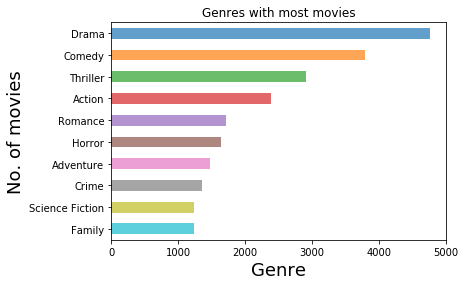

In [110]:
# Representing the answer to Question 10 visually
ax = df_genres_with_max_movies.plot(kind='barh', title = 'Genres with most movies', alpha = .7)
ax.invert_yaxis()
plt.xlabel('Genre', fontsize=18)
plt.ylabel('No. of movies', fontsize=18);

### Research Question 11 (Is there a correlation between movie runtimes and popularity?)

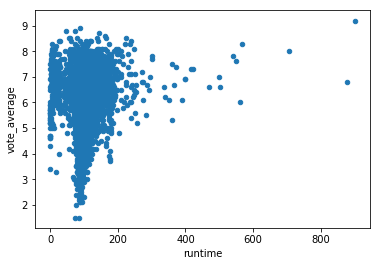

In [111]:
df_movie_list.plot(x = 'runtime', y = 'vote_average', kind = 'scatter');

### Conclusion

It seems so - in general, shorter movies seem to be more popular than longer ones. Of course, there are a few outliers which seem to be exceptions to that rule

### Research Question 12 (Are more movies released each year?)

In [112]:
df_rel_year = df_movie_list.groupby('release_year').count()['id']
# df_rel_year = df_rel_year.sort_values('release_year', ascending = True)

df_rel_year.head(10)

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: id, dtype: int64

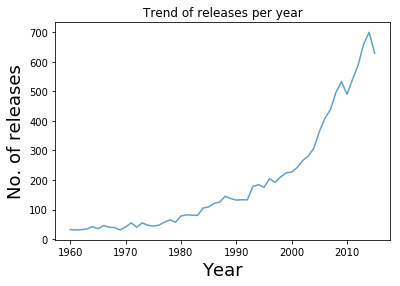

In [113]:
# Representing the answer to Question 12 visually
ax = df_rel_year.plot(kind='line', title = 'Trend of releases per year', alpha = .7)
plt.xlabel('Year', fontsize=18)
plt.ylabel('No. of releases', fontsize=18);

### Conclusion

The trendline clearly says yes.

### Research Question 13 (Who are directors' favorite actors?)

In [114]:
df_by_dir = df_movie_list.merge(df_mv.query('type == "Director"'), on='id', how='inner')[['id', 'value']]
df_by_dir_cast = df_by_dir.merge(df_mv.query('type == "Cast"'), on = 'id', how = 'inner')[['id', 'value_x', 'value_y']]
df_by_dir_cast = df_by_dir_cast.rename(columns = {'value_x': 'director', 'value_y': 'cast'})

# Filtering out directors who cast themselves into their movies, for example Woody Allen
df_by_dir_cast = df_by_dir_cast.query('director != cast').groupby(['director', 'cast']).count()['id'].nlargest(10)

df_by_dir_cast.head(10)

director          cast                
Woody Allen       Mia Farrow              12
Gerald Thomas     Kenneth Williams        11
                  Charles Hawtrey         10
                  Sid James               10
                  Joan Sims                9
Martin Scorsese   Robert De Niro           9
Dennis Dugan      Adam Sandler             8
Dwight H. Little  Cary-Hiroyuki Tagawa     8
                  Ian Anthony Dale         8
                  Jon Foo                  8
Name: id, dtype: int64

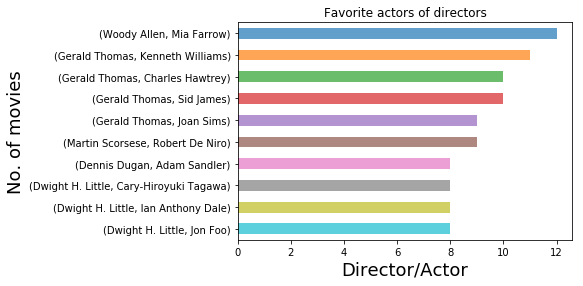

In [115]:
# Representing the answer to Question 13 visually
ax = df_by_dir_cast.plot(kind='barh', title = 'Favorite actors of directors', alpha = .7)
ax.invert_yaxis()
plt.xlabel('Director/Actor', fontsize=18)
plt.ylabel('No. of movies', fontsize=18);

In [116]:
# Question 14
# Who are actors' favorite directors?

df_by_cast = df_movie_list.merge(df_mv.query('type == "Cast"'), on='id', how='inner')[['id', 'value']]
df_by_cast_dir = df_by_cast.merge(df_mv.query('type == "Director"'), on = 'id', how = 'inner')[['id', 'value_x', 'value_y']]
df_by_cast_dir = df_by_cast_dir.rename(columns = {'value_x': 'cast', 'value_y': 'director'})

# Filtering out directors who cast themselves into their movies, for example Woody Allen
df_by_cast_dir = df_by_cast_dir.query('director != cast').groupby(['cast', 'director']).count()['id'].nlargest(10)

df_by_cast_dir.head(10)

cast                  director        
Mia Farrow            Woody Allen         12
Kenneth Williams      Gerald Thomas       11
Charles Hawtrey       Gerald Thomas       10
Sid James             Gerald Thomas       10
Joan Sims             Gerald Thomas        9
Robert De Niro        Martin Scorsese      9
Adam Sandler          Dennis Dugan         8
Cary-Hiroyuki Tagawa  Dwight H. Little     8
Ian Anthony Dale      Dwight H. Little     8
Johnny Depp           Tim Burton           8
Name: id, dtype: int64

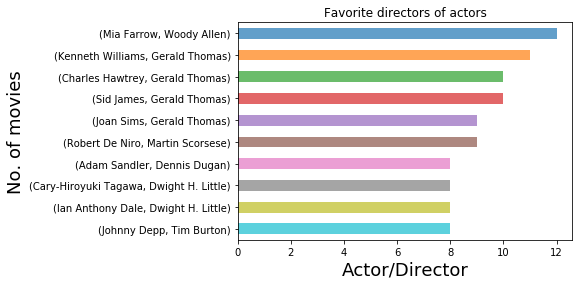

In [117]:
# Representing the answer to Question 14 visually
ax = df_by_cast_dir.plot(kind='barh', title = 'Favorite directors of actors', alpha = .7);
ax.invert_yaxis()
plt.xlabel('Actor/Director', fontsize=18)
plt.ylabel('No. of movies', fontsize=18);

### Conclusion

I expected the results for both Questions 13 and 14 to be the same. It mostly is except for the last pair.